Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data.

# steps to follow
importing the data and performing EDA
Feature analysis
Standardize or normalize the data
performing PCA
k means and Heirarchial clustering on both the original dataset and PCA performed data set
coming up with a conclusion

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pylab as pl

In [2]:
data = pd.read_csv('wine.csv')
data
data.info()
data.describe()
#no null values and all numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [3]:
profile = pp.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

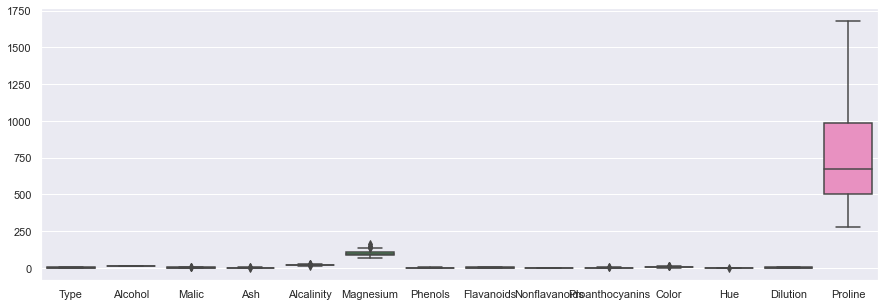

In [4]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=data) 

In [5]:
# all features except type used in model building. no need to create any dummy variable as all the values are numerical

In [6]:
#k means
# Standardize & Normalize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [7]:
# Heirarchial

array = data.iloc[:,1:]  #Type is column is of no use
norm_scaler = MinMaxScaler(feature_range=(0,1))
normscaled = norm_scaler.fit_transform(array)
set_printoptions(precision=2)
print(normscaled[:5])

[[0.84 0.19 0.57 0.26 0.62 0.63 0.57 0.28 0.59 0.37 0.46 0.97 0.56]
 [0.57 0.21 0.42 0.03 0.33 0.58 0.51 0.25 0.27 0.26 0.46 0.78 0.55]
 [0.56 0.32 0.7  0.41 0.34 0.63 0.61 0.32 0.76 0.38 0.45 0.7  0.65]
 [0.88 0.24 0.61 0.32 0.47 0.99 0.66 0.21 0.56 0.56 0.31 0.8  0.86]
 [0.58 0.37 0.81 0.54 0.52 0.63 0.5  0.49 0.44 0.26 0.46 0.61 0.33]]


PCA

k means
Standardized values will be used for K-Means and Normalised will be used for Agglomerative clustering.

In [8]:
pca_arr = PCA(n_components = 3)
pca_std_arr = pca_arr.fit_transform(scaled_data)
pca_std_arr[:5]

array([[ 3.32, -1.44, -0.17],
       [ 2.21,  0.33, -2.03],
       [ 2.52, -1.03,  0.98],
       [ 3.76, -2.76, -0.18],
       [ 1.01, -0.87,  2.03]])

In [9]:
var1 =pca_arr.explained_variance_ratio_
var1
# explains only 69% of the data

array([0.36, 0.19, 0.11])

In [10]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([36.2 , 55.41, 66.53])

In [11]:
# making a data set for k means PCA
pca_std_df = pd.DataFrame(pca_std_arr)
pca_std_df.head()

0         1         2
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

# Agglomerative

In [12]:
pca_norm_arr = pca_arr.fit_transform(normscaled)
pca_norm_arr[:5]

array([[-0.71, -0.25,  0.02],
       [-0.48, -0.01, -0.28],
       [-0.52, -0.19,  0.2 ],
       [-0.82, -0.58,  0.08],
       [-0.2 , -0.06,  0.3 ]])

In [13]:
var1 =pca_arr.explained_variance_ratio_
var1

array([0.41, 0.19, 0.09])

In [14]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([40.75, 59.72, 68.28])

In [15]:
# making a data set for agglomerative PCA
pca_norm_df = pd.DataFrame(pca_norm_arr)
pca_norm_df.head()

0         1         2
0 -0.706336 -0.253193  0.024093
1 -0.484977 -0.008823 -0.280482
2 -0.521172 -0.189187  0.196217
3 -0.821644 -0.580906  0.081110
4 -0.202546 -0.059467  0.300240

performing k means clustering for PCA dataset

C:\Users\amanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

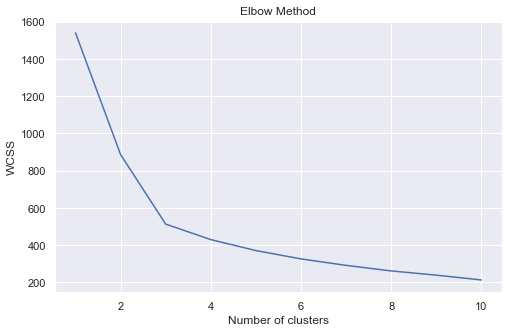

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(8,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# no of optimum cluseters = 3

In [17]:
clusters_kmeans_pca = KMeans(3, random_state=50)
clusters_kmeans_pca.fit(pca_std_df)

KMeans(n_clusters=3, random_state=50)

In [18]:
clusters_kmeans_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
data_kmeans_pca = pca_std_df.copy()
data_kmeans_pca['clusters_kmeans'] = clusters_kmeans_pca.labels_

In [20]:
data_kmeans_pca.groupby('clusters_kmeans').agg(['mean'])

0         1         2
                     mean      mean      mean
clusters_kmeans                              
0                2.276194 -0.932054  0.001528
1               -2.720036 -1.125651 -0.239093
2               -0.036957  1.772239  0.186139

In [21]:
data_kmeans_pca['clusters_kmeans'].value_counts()

2    65
0    62
1    51
Name: clusters_kmeans, dtype: int64

In [22]:
data_kmeans_pca

0         1         2  clusters_kmeans
0    3.316751 -1.443463 -0.165739                0
1    2.209465  0.333393 -2.026457                0
2    2.516740 -1.031151  0.982819                0
3    3.757066 -2.756372 -0.176192                0
4    1.008908 -0.869831  2.026688                0
..        ...       ...       ...              ...
173 -3.370524 -2.216289 -0.342570                1
174 -2.601956 -1.757229  0.207581                1
175 -2.677839 -2.760899 -0.940942                1
176 -2.387017 -2.297347 -0.550696                1
177 -3.208758 -2.768920  1.013914                1

[178 rows x 4 columns]

C:\Users\amanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

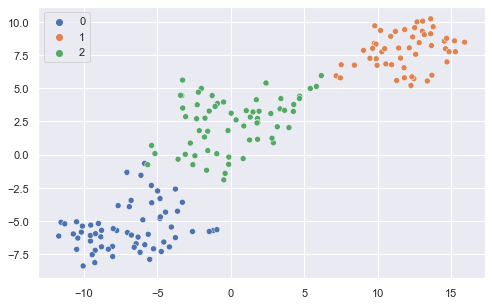

In [23]:
#Visualising the data via dimensionality reduction t-Sine
data_tsne_pca_kmeans = TSNE(n_components=2).fit_transform(data_kmeans_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_kmeans[:,0],data_tsne_pca_kmeans[:,1],hue=clusters_kmeans_pca.labels_, palette="deep")

K means clustering on original dataset

C:\Users\amanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

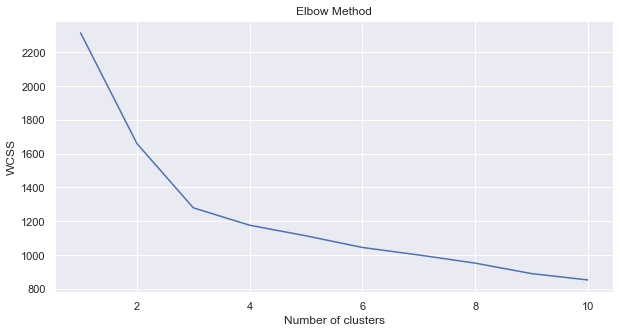

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc={'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#Optimal number of Clusters = 3

In [25]:
clusters_kmeans = KMeans(3, random_state=50)
clusters_kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=50)

In [26]:
clusters_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [27]:
#Assigning clusters to the datset
data_kmeans = data.iloc[:,1:].copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [28]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                      mean      mean      mean       mean        mean   
clusters_kmeans                                                         
0                13.676774  1.997903  2.466290  17.462903  107.967742   
1                13.134118  3.307255  2.417647  21.241176   98.666667   
2                12.250923  1.897385  2.231231  20.063077   92.738462   

                  Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                     mean       mean          mean            mean      mean   
clusters_kmeans                                                                
0                2.847581   3.003226      0.292097        1.922097  5.453548   
1                1.683922   0.818824      0.451961        1.145882  7.234706   
2                2.247692   2.050000      0.357692        1.624154  2.973077   

                      Hue  Dilution      Proline  
                     mean      mean         mean  
clusters_kmeans                                   
0                1.065484  3.163387  1100.225806  
1                0.691961  1.696667   619.058824  
2                1.062708  2.803385   510.169231

In [29]:
data_kmeans['clusters_kmeans'].value_counts()

2    65
0    62
1    51
Name: clusters_kmeans, dtype: int64

In [30]:
data_kmeans

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0             0.28             2.29   5.64  1.04      3.92     1065   
1             0.26             1.28   4.38  1.05      3.40     1050   
2             0.30             2.81   5.68  1.03      3.17     1185   
3             0.24             2.18   7.80  0.86      3.45     1480   
4             0.39             1.82   4.32  1.04      2.93      735   
..             ...              ...    ...   ...       ...      ...   
173           0.52             1.06   7.70  0.64      1.74      740   
174           0.43             1.41   7.30  0.70      1.56      750   
175           0.43             1.35  10.20  0.59      1.56      835   
176           0.53             1.46   9.30  0.60      1.62      840   
177           0.56             1.35   9.20  0.61      1.60      560   

     clusters_kmeans  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
..               ...  
173                1  
174                1  
175                1  
176                1  
177                1  

[178 rows x 14 columns]

In [31]:
#Visualising the data via dimensionality reduction
pca = PCA(n_components=2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

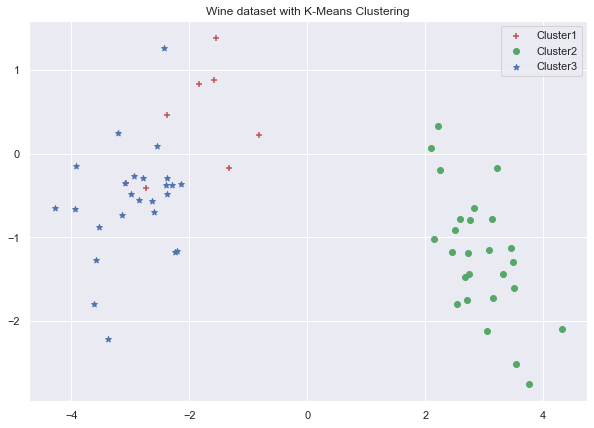

In [34]:
sns.set(rc={'figure.figsize':(10,7)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2','Cluster3'])
pl.title('Wine dataset with K-Means Clustering')
pl.show() 
#Not good visualisation compared to t-Sine

Heirarchial Agglomerative Clustering - PCA

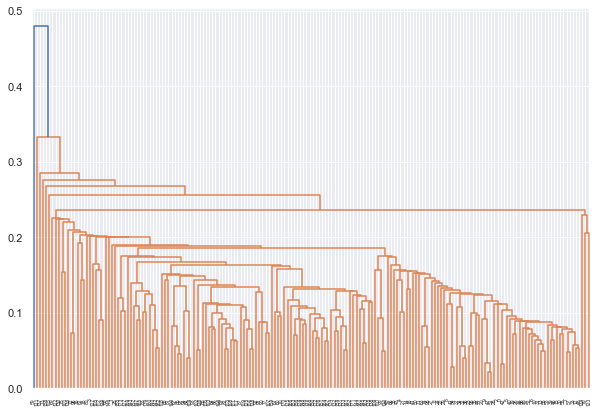

In [36]:
#dendogram
dendrogram = sch.dendrogram(sch.linkage(pca_norm_df, method='single'))

In [37]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
agglo_pca = hc.fit_predict(pca_norm_df)

In [38]:
#labels
agglo_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [39]:
data_agglo_pca = pca_norm_df.copy()
data_agglo_pca['clusters_agglo'] = agglo_pca
data_agglo_pca.head()

0         1         2  clusters_agglo
0 -0.706336 -0.253193  0.024093               1
1 -0.484977 -0.008823 -0.280482               1
2 -0.521172 -0.189187  0.196217               1
3 -0.821644 -0.580906  0.081110               1
4 -0.202546 -0.059467  0.300240               1

In [40]:
data_agglo_pca.clusters_agglo.value_counts()

0    107
1     62
2      9
Name: clusters_agglo, dtype: int64

In [41]:
#visualization
data_agglo_pca.groupby('clusters_agglo').agg(['mean'])

0         1         2
                    mean      mean      mean
clusters_agglo                              
0               0.273576  0.091682 -0.039456
1              -0.485404 -0.198350 -0.000034
2               0.091377  0.276421  0.469319

C:\Users\amanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'T-Sine Visualisation of Agglo PCA clustering')

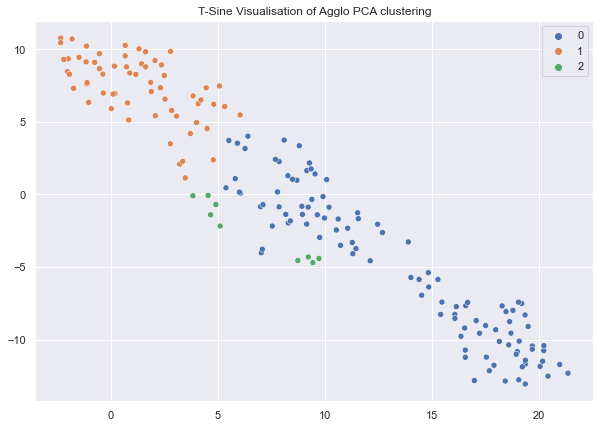

In [42]:
data_tsne_pca_agglo = TSNE(n_components=2).fit_transform(data_agglo_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_agglo[:,0],data_tsne_pca_agglo[:,1],
                hue=agglo_pca, palette="deep").set_title('T-Sine Visualisation of Agglo PCA clustering')

Heirarchial Agglomerative Clustering - Original Dataset
Identifying the hyperparameters
Number of Clusters = 3

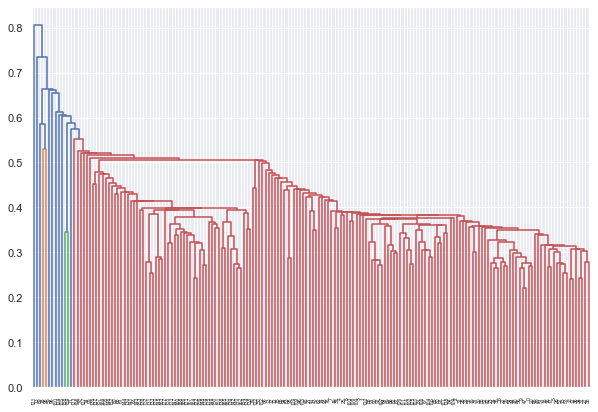

In [43]:
#dendogram
dendrogram = sch.dendrogram(sch.linkage(normscaled, method='single'))

In [44]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)

In [45]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [47]:
data_agglo = data.iloc[:,1:].copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.clusters_agglo.value_counts()

0    73
1    62
2    43
Name: clusters_agglo, dtype: int64

In [48]:
data_agglo.groupby('clusters_agglo').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                     mean      mean      mean       mean        mean   
clusters_agglo                                                         
0               12.280822  1.916301  2.227534  19.923288   94.739726   
1               13.699194  1.997742  2.473871  17.559677  106.741935   
2               13.215349  3.537674  2.447674  21.558140   98.139535   

                 Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                    mean       mean          mean            mean      mean   
clusters_agglo                                                                
0               2.170274   1.926712      0.363562        1.570274  3.268082   
1               2.854839   3.012742      0.290323        1.899355  5.466129   
2               1.700000   0.785349      0.462093        1.181163  7.508605   

                     Hue  Dilution      Proline  
                    mean      mean         mean  
clusters_agglo                                   
0               1.025425  2.647671   526.616438  
1               1.068710  3.171935  1091.725806  
2               0.681628  1.742791   623.651163

In [49]:
pca_agg = PCA(n_components=2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

Text(0.5, 1.0, 'Wine dataset with Heirarchial Agglo Clustering')

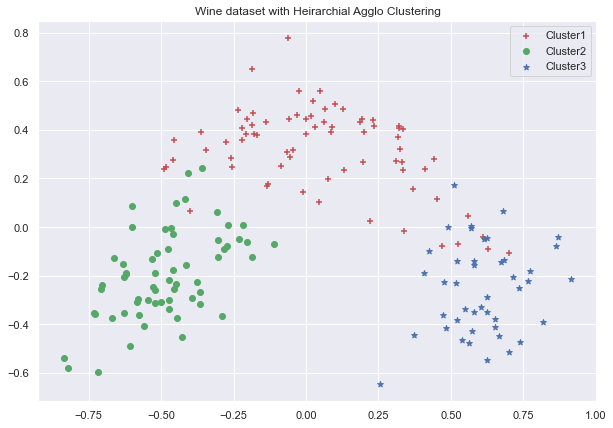

In [50]:
for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1],c='b', marker='*')  
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
pl.title('Wine dataset with Heirarchial Agglo Clustering')

Conclusion

reducing the high dimension data using PCA and T sine vefore plotting.